# Composición de filas y columnas del dataset.
# Descripción de los campos.

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

df_link = pd.read_csv('./mllinks.csv')
df_movies = pd.read_csv("./movies.csv")
df_ratings = pd.read_csv("./ratings.csv")

df_tags = pd.read_csv("./tags.csv")

#print(df_link.head())
print(df_link.shape)

#explorando los datos
df_link.info()

FileNotFoundError: [Errno 2] File ./ml-latest-small/mllinks.csv does not exist: './ml-latest-small/mllinks.csv'


Los identificadores que se pueden usar para enlazar con otras fuentes de datos de la película están contenidos en el archivo "links.csv". Cada línea de este archivo después de la fila de encabezamiento representa una película, y tiene el siguiente formato:

    movieId,imdbId,tmdbId

movieId es un identificador de películas usado por <https://movielens.org>. Por ejemplo, la película Toy Story tiene el enlace <https://movielens.org/movies/1>.

imdbId es un identificador para las películas usadas por <http://www.imdb.com>. Por ejemplo, la película Toy Story tiene el enlace <http://www.imdb.com/title/tt0114709/>.

tmdbId es un identificador para las películas usadas por <https://www.themoviedb.org>. Por ejemplo, la película Toy Story tiene el enlace <https://www.themoviedb.org/movie/862>.


In [1]:
print(df_movies.head())
print(df_movies.shape)

#explorando los datos
df_movies.info()

NameError: name 'df_movies' is not defined

La información de la película está contenida en el archivo "movies.csv". Cada línea de este archivo después de la fila de encabezamiento representa una película, y tiene el siguiente formato:

    movieId,título,géneros

Los títulos de las películas se introducen manualmente o se importan desde <https://www.themoviedb.org/>, e incluyen el año de estreno entre paréntesis. Pueden existir errores e inconsistencias en estos títulos.

Los géneros son una lista separada de la tubería, y se seleccionan de los siguientes:

* Acción
* Aventura
* Animación
* Niños
* Comedia
* Crimen
* Documental
* Drama
* Fantasía
* Film-Noir
* Horror
* Musical
* Misterio
* Romance
* Ciencia Ficción
* Thriller
* Guerra
* Occidental
* (no hay géneros listados)


In [59]:
print(df_ratings.head())

print(df_ratings.shape)

#explorando los datos
df_ratings.info()

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Todas las clasificaciones están contenidas en el archivo "ratings.csv". Cada línea de este archivo después de la fila de encabezamiento representa una calificación de una película por un usuario, y tiene el siguiente formato:

    userId,movieId,rating,timestamping

Las líneas de este archivo están ordenadas primero por el ID de usuario, luego, dentro del usuario, por el ID de la película.

Las clasificaciones se hacen en una escala de 5 estrellas, con incrementos de media estrella (0,5 estrellas - 5,0 estrellas).

Las marcas de tiempo representan segundos desde la medianoche del 1 de enero de 1970.

In [ ]:
print(df_tags.head())
print(df_tags.shape)

#explorando los datos
df_tags.info() 

df_tags.describe()

Todas las etiquetas están contenidas en el archivo `tags.csv`. Cada línea de este archivo después de la línea de encabezado representa una etiqueta aplicada a una película por un usuario, y tiene el siguiente formato:

    userId,movieId,tag,timestamp

Las líneas de este archivo están ordenadas primero por el ID de usuario, luego, dentro del usuario, por el ID de la película.

Las etiquetas son metadatos generados por el usuario sobre las películas. Cada etiqueta es típicamente una sola palabra o frase corta. El significado, el valor y el propósito de una etiqueta en particular es determinado por cada usuario.

Las marcas de tiempo representan segundos desde la medianoche del 1 de enero de 1970.


La mayoria de valoraciones esta entre 3 y 4 estrellas

# Comentar como relacionar los datos de las diferentes tablas.


In [49]:
pd.merge(df_movies,df_ratings,how='inner',on='movieId').head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


In [96]:
pd.merge(df_movies,df_tags,how='inner',on='movieId').head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


# Valores perdidos y outlier.


In [99]:
total = df_movies.isnull().sum().sort_values(ascending=False)
percent_1 = df_movies.isnull().sum()/df_movies.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
genres,0,0.0
title,0,0.0
movieId,0,0.0


In [100]:
total = df_link.isnull().sum().sort_values(ascending=False)
percent_1 = df_link.isnull().sum()/df_link.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
tmdbId,8,0.1
imdbId,0,0.0
movieId,0,0.0


In [101]:

total = df_ratings.isnull().sum().sort_values(ascending=False)
percent_1 = df_ratings.isnull().sum()/df_ratings.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
timestamp,0,0.0
rating,0,0.0
movieId,0,0.0
userId,0,0.0


In [102]:

total = df_tags.isnull().sum().sort_values(ascending=False)
percent_1 = df_tags.isnull().sum()/df_tags.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
timestamp,0,0.0
tag,0,0.0
movieId,0,0.0
userId,0,0.0


# Alguna otra información que veáis relevante.

In [78]:

n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.movieId.unique().shape[0]
print (str(n_users) + ' usuarios')
print (str(n_items) + ' peliculas')

610 usuarios
9724 peliculas


In [97]:
agrupacion_tag = df_tags.groupby(["tag"])["movieId"].count()
agrupacion_tag.head()

tag
"artsy"                                      1
06 Oscar Nominated Best Movie - Animation    3
1900s                                        1
1920s                                        2
1950s                                        2
Name: movieId, dtype: int64

In [98]:
agrupacion_tag.describe()

count    1589.000000
mean        2.317810
std         4.421902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       131.000000
Name: movieId, dtype: float64

In [93]:
df_ratings.groupby(["rating"])["userId"].count()

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: userId, dtype: int64

In [126]:
df_movies.genres.unique().shape[0]

951

# Aportar gráficas para entender los datos.

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

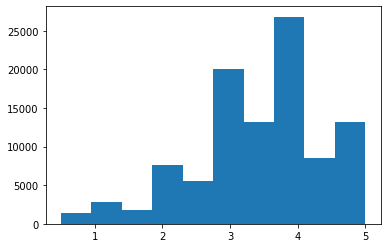

In [95]:
plt.hist(df_ratings.rating)

(array([1.562e+03, 7.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.,  19.,  37.,  55.,  73.,  91., 109., 127., 145., 163., 181.]),
 <a list of 10 Patch objects>)

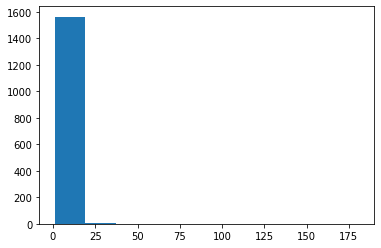

In [136]:
plt.hist(df_tags.groupby(["movieId"])['tag'].count())